In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from plotting_utils import save_figure
import umap
sns.set_style("whitegrid", {'axes.grid' : False})
from dimensionality_reduction import pca_reduction, tsne_reduction, umap_reduction
from k_means_clusters import cluster_and_visualize, cluster_from_file
import pickle
from bert_transformer import generate_bert_embeddings
from wordcloud import WordCloud
import torch

In [2]:
# read processed_data_all_labeled.csv from data folder without long path not being in the root
df = pd.read_csv('/Users/annabzinkowska/DTU/master_thesis/data/processed_data_all.csv')

### BERT embeddings

In [11]:
# embeddings_matrix = generate_bert_embeddings(df, 'description')

In [3]:
save_path = './bert_embeddings.pkl'

In [13]:
# # Save the computed embeddings to a file
# with open(save_path, 'wb') as f:
#       pickle.dump(embeddings_matrix, f)
#       print(f"Embeddings saved to {save_path}")

Embeddings saved to ./bert_embeddings.pkl


In [4]:
# Open and load the embeddings from the file
try:
    with open(save_path, 'rb') as f:
        embeddings_martix = pickle.load(f)
        print(f"Embeddings loaded from {save_path}")
except FileNotFoundError:
    print(f"File not found: {save_path}")

Embeddings loaded from ./bert_embeddings.pkl


## Reduction and Clustering

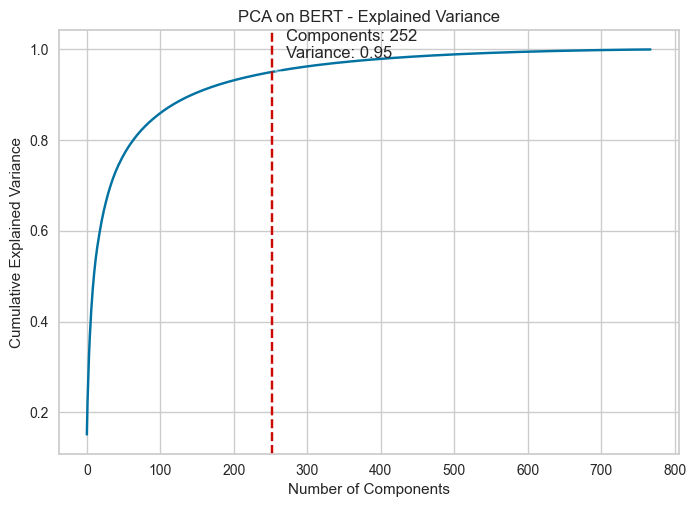

In [5]:
X_pca = pca_reduction(embeddings_martix, 'BERT')

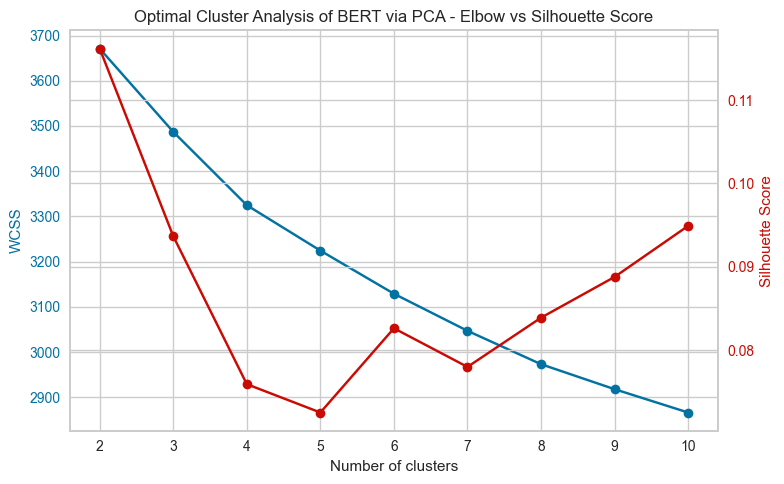

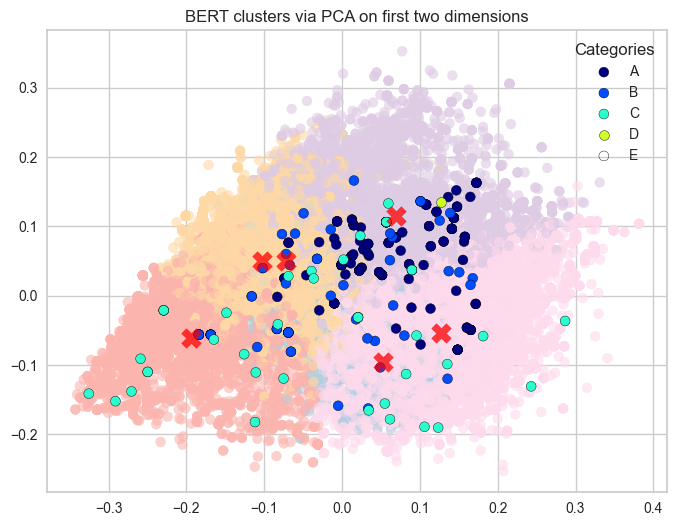

product_id                             description  month_mode  \
0         010004  cfcf sfy bolted hanger nptf stud viton           2   
1         010005  cfcf sfy bolted hanger nptf stud viton          10   
2         010006  cfcf sfy bolted hanger nptf stud viton          10   
3         010015  cfcf sfy bolted hanger nptf stud viton           1   
4         010040  cfcf sfy bolted hanger nptf stud viton           1   
...          ...                                     ...         ...   
35181     TE929K                           slide bearing           3   
35182   TE980931              weld adapt tz npt sch pipe          12   
35183    TEB6042                            bottom liner          10   
35184    TEB604Z                                    stem           6   
35185     TEB605                                impeller           3   

       quarter_mode  year_mode  day_week_mode  quantity_sum  price_sum  \
0                 1       2020              2             6     232.92   
1                 4       2019              2           200    1774.00   
2                 4       2019              2           300    1848.00   
3                 1       2019              2           300    2115.00   
4                 1       2019              2           400    3119.00   
...             ...        ...            ...           ...        ...   
35181             1       2016              4           636   15681.71   
35182             4       2017              4             6     524.95   
35183             3       2017              1           158    1827.25   
35184             1       2020              1            13    2586.04   
35185             1       2019              1            14     939.68   

       unit_weight customer_country_mode  customer_country_count  \
0            0.124                    DK                       1   
1            0.259                    CO                       1   
2            0.276                    CO                       1   
3            0.318                    SE                       2   
4            0.363                    CO                       2   
...            ...                   ...                     ...   
35181        0.011                    US                      20   
35182        0.270                    GB                       2   
35183        0.038                    SE                      15   
35184        1.150                    US                       4   
35185        0.120                    SE                       1   

       customer_id_count category  unit_price_mean  \
0                      1       -1          38.8200   
1                      1       -1           8.8700   
2                      1       -1           6.1600   
3                      2       -1           7.0500   
4                      2       -1           7.7975   
...                  ...      ...              ...   
35181                 23       -1          24.6568   
35182                  2       -1          87.4917   
35183                 18       -1          11.5649   
35184                  6       -1         198.9262   
35185                  1       -1          67.1200   

                                    description_original  \
0      C24FCF-1/2-SFY-S              BOLTED HANGER, N...   
1      C24FCF-1-SFY-S                BOLTED HANGER, N...   
2      C24FCF-1 1/2-SFY-S            BOLTED HANGER, N...   
3      C24FCF-2-SFY-S                BOLTED HANGER, N...   
4      C24FCF-3-SFY-S                BOLTED HANGER, N...   
...                                                  ...   
35181  SLIDE BEARING                                 ...   
35182  WELD.ADAPT. TZ-74             NPT/1½"SCH40 PIP...   
35183  BOTTOM LINER                                  ...   
35184  STEM                                          ...   
35185  IMPELLER                                      ...   

       BERT_PCA_Cluster_Labels  BERT_PCA_Distance_to_Centroid  
0

In [6]:
cluster_and_visualize(X_pca, df, reduction_method_name="PCA", feature_type="BERT")

### t-SNE

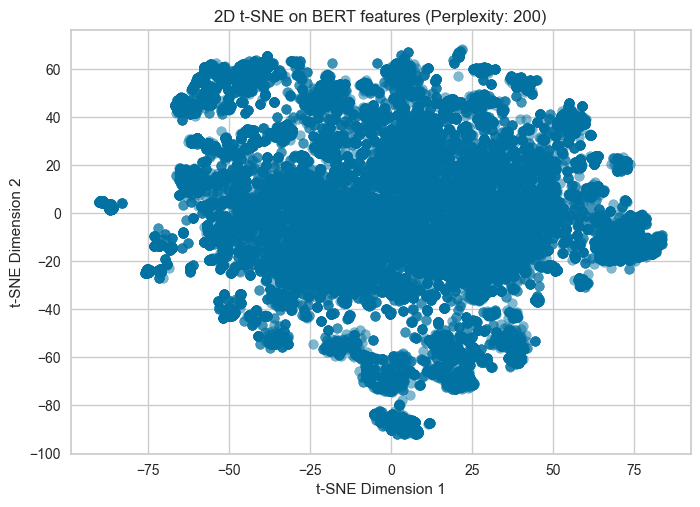

In [8]:
X_tsne = tsne_reduction(embeddings_martix, 'BERT', perplexity=200, metric='cosine')

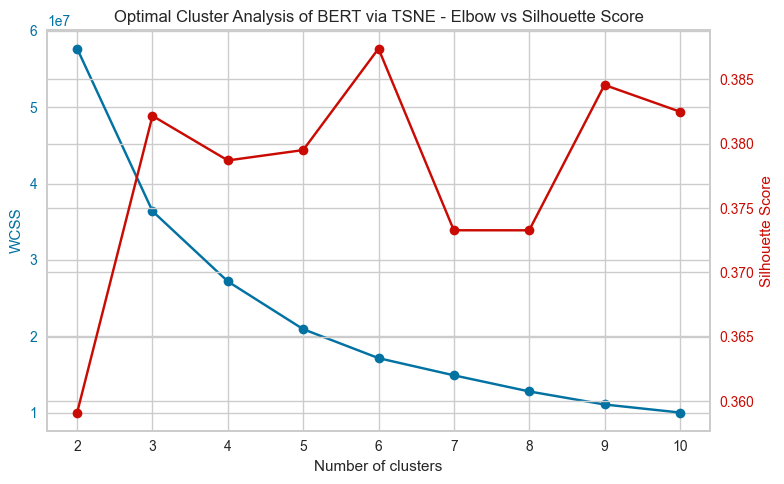

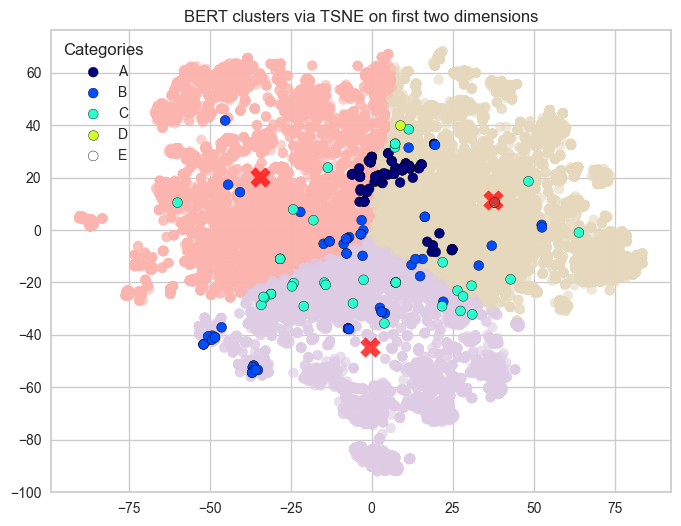

product_id                             description  month_mode  \
0         010004  cfcf sfy bolted hanger nptf stud viton           2   
1         010005  cfcf sfy bolted hanger nptf stud viton          10   
2         010006  cfcf sfy bolted hanger nptf stud viton          10   
3         010015  cfcf sfy bolted hanger nptf stud viton           1   
4         010040  cfcf sfy bolted hanger nptf stud viton           1   
...          ...                                     ...         ...   
35181     TE929K                           slide bearing           3   
35182   TE980931              weld adapt tz npt sch pipe          12   
35183    TEB6042                            bottom liner          10   
35184    TEB604Z                                    stem           6   
35185     TEB605                                impeller           3   

       quarter_mode  year_mode  day_week_mode  quantity_sum  price_sum  \
0                 1       2020              2             6     232.92   
1                 4       2019              2           200    1774.00   
2                 4       2019              2           300    1848.00   
3                 1       2019              2           300    2115.00   
4                 1       2019              2           400    3119.00   
...             ...        ...            ...           ...        ...   
35181             1       2016              4           636   15681.71   
35182             4       2017              4             6     524.95   
35183             3       2017              1           158    1827.25   
35184             1       2020              1            13    2586.04   
35185             1       2019              1            14     939.68   

       unit_weight customer_country_mode  customer_country_count  \
0            0.124                    DK                       1   
1            0.259                    CO                       1   
2            0.276                    CO                       1   
3            0.318                    SE                       2   
4            0.363                    CO                       2   
...            ...                   ...                     ...   
35181        0.011                    US                      20   
35182        0.270                    GB                       2   
35183        0.038                    SE                      15   
35184        1.150                    US                       4   
35185        0.120                    SE                       1   

       customer_id_count category  unit_price_mean  \
0                      1       -1          38.8200   
1                      1       -1           8.8700   
2                      1       -1           6.1600   
3                      2       -1           7.0500   
4                      2       -1           7.7975   
...                  ...      ...              ...   
35181                 23       -1          24.6568   
35182                  2       -1          87.4917   
35183                 18       -1          11.5649   
35184                  6       -1         198.9262   
35185                  1       -1          67.1200   

                                    description_original  \
0      C24FCF-1/2-SFY-S              BOLTED HANGER, N...   
1      C24FCF-1-SFY-S                BOLTED HANGER, N...   
2      C24FCF-1 1/2-SFY-S            BOLTED HANGER, N...   
3      C24FCF-2-SFY-S                BOLTED HANGER, N...   
4      C24FCF-3-SFY-S                BOLTED HANGER, N...   
...                                                  ...   
35181  SLIDE BEARING                                 ...   
35182  WELD.ADAPT. TZ-74             NPT/1½"SCH40 PIP...   
35183  BOTTOM LINER                                  ...   
35184  STEM                                          ...   
35185  IMPELLER                                      ...   

       BERT_PCA_Cluster_Labels  BERT_PCA_Distance_to_Centroid  \


In [9]:
cluster_and_visualize(X_tsne, df, reduction_method_name="TSNE", feature_type="BERT")

/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


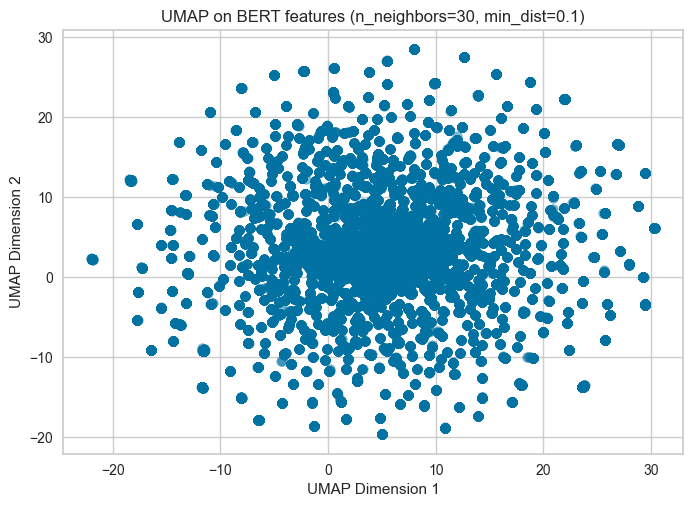

In [11]:
X_umap = umap_reduction(embeddings_martix, n_neighbors=30, min_dist=0.1, feature_type='BERT', metric='cosine')

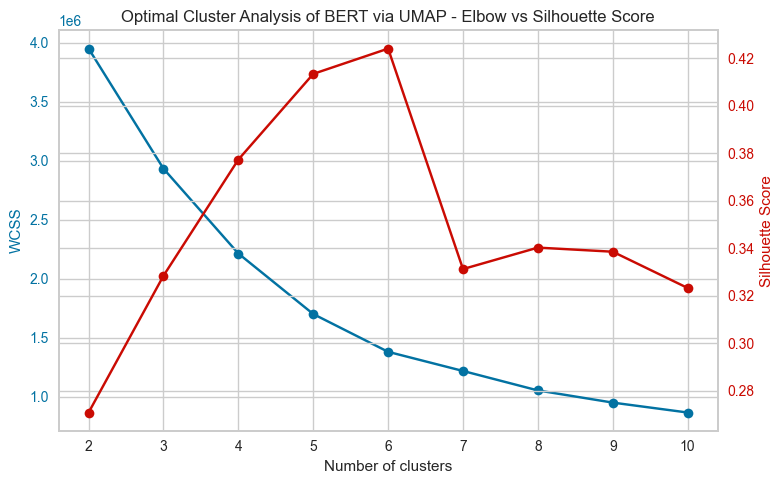

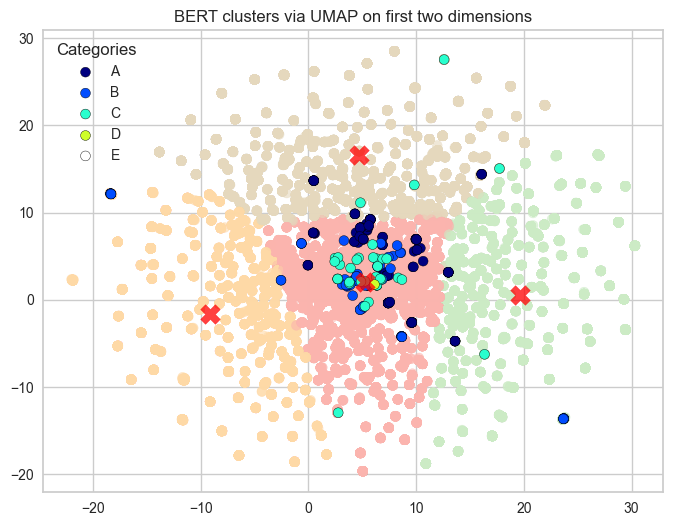

product_id                             description  month_mode  \
0         010004  cfcf sfy bolted hanger nptf stud viton           2   
1         010005  cfcf sfy bolted hanger nptf stud viton          10   
2         010006  cfcf sfy bolted hanger nptf stud viton          10   
3         010015  cfcf sfy bolted hanger nptf stud viton           1   
4         010040  cfcf sfy bolted hanger nptf stud viton           1   
...          ...                                     ...         ...   
35181     TE929K                           slide bearing           3   
35182   TE980931              weld adapt tz npt sch pipe          12   
35183    TEB6042                            bottom liner          10   
35184    TEB604Z                                    stem           6   
35185     TEB605                                impeller           3   

       quarter_mode  year_mode  day_week_mode  quantity_sum  price_sum  \
0                 1       2020              2             6     232.92   
1                 4       2019              2           200    1774.00   
2                 4       2019              2           300    1848.00   
3                 1       2019              2           300    2115.00   
4                 1       2019              2           400    3119.00   
...             ...        ...            ...           ...        ...   
35181             1       2016              4           636   15681.71   
35182             4       2017              4             6     524.95   
35183             3       2017              1           158    1827.25   
35184             1       2020              1            13    2586.04   
35185             1       2019              1            14     939.68   

       unit_weight customer_country_mode  ...  customer_id_count  category  \
0            0.124                    DK  ...                  1        -1   
1            0.259                    CO  ...                  1        -1   
2            0.276                    CO  ...                  1        -1   
3            0.318                    SE  ...                  2        -1   
4            0.363                    CO  ...                  2        -1   
...            ...                   ...  ...                ...       ...   
35181        0.011                    US  ...                 23        -1   
35182        0.270                    GB  ...                  2        -1   
35183        0.038                    SE  ...                 18        -1   
35184        1.150                    US  ...                  6        -1   
35185        0.120                    SE  ...                  1        -1   

      unit_price_mean                               description_original  \
0             38.8200  C24FCF-1/2-SFY-S              BOLTED HANGER, N...   
1              8.8700  C24FCF-1-SFY-S                BOLTED HANGER, N...   
2              6.1600  C24FCF-1 1/2-SFY-S            BOLTED HANGER, N...   
3              7.0500  C24FCF-2-SFY-S                BOLTED HANGER, N...   
4              7.7975  C24FCF-3-SFY-S                BOLTED HANGER, N...   
...               ...                                                ...   
35181         24.6568  SLIDE BEARING                                 ...   
35182         87.4917  WELD.ADAPT. TZ-74             NPT/1½"SCH40 PIP...   
35183         11.5649  BOTTOM LINER                                  ...   
35184        198.9262  STEM                                          ...   
35185         67.1200  IMPELLER                                      ...   

      BERT_PCA_Cluster_Labels  BERT_PCA_Distance_to_Centroid  \
0                           2                       0.292370   
1                           2                       0.292381   
2                           2                       0.292367   
3                           2                       0.292386   
4                           2                       0.292312   
...               

In [12]:
cluster_and_visualize(X_umap, df, "UMAP", "BERT")

In [13]:
df.to_csv('/Users/annabzinkowska/DTU/master_thesis/data/df_BERT_clusters.csv', index=False)

## Other

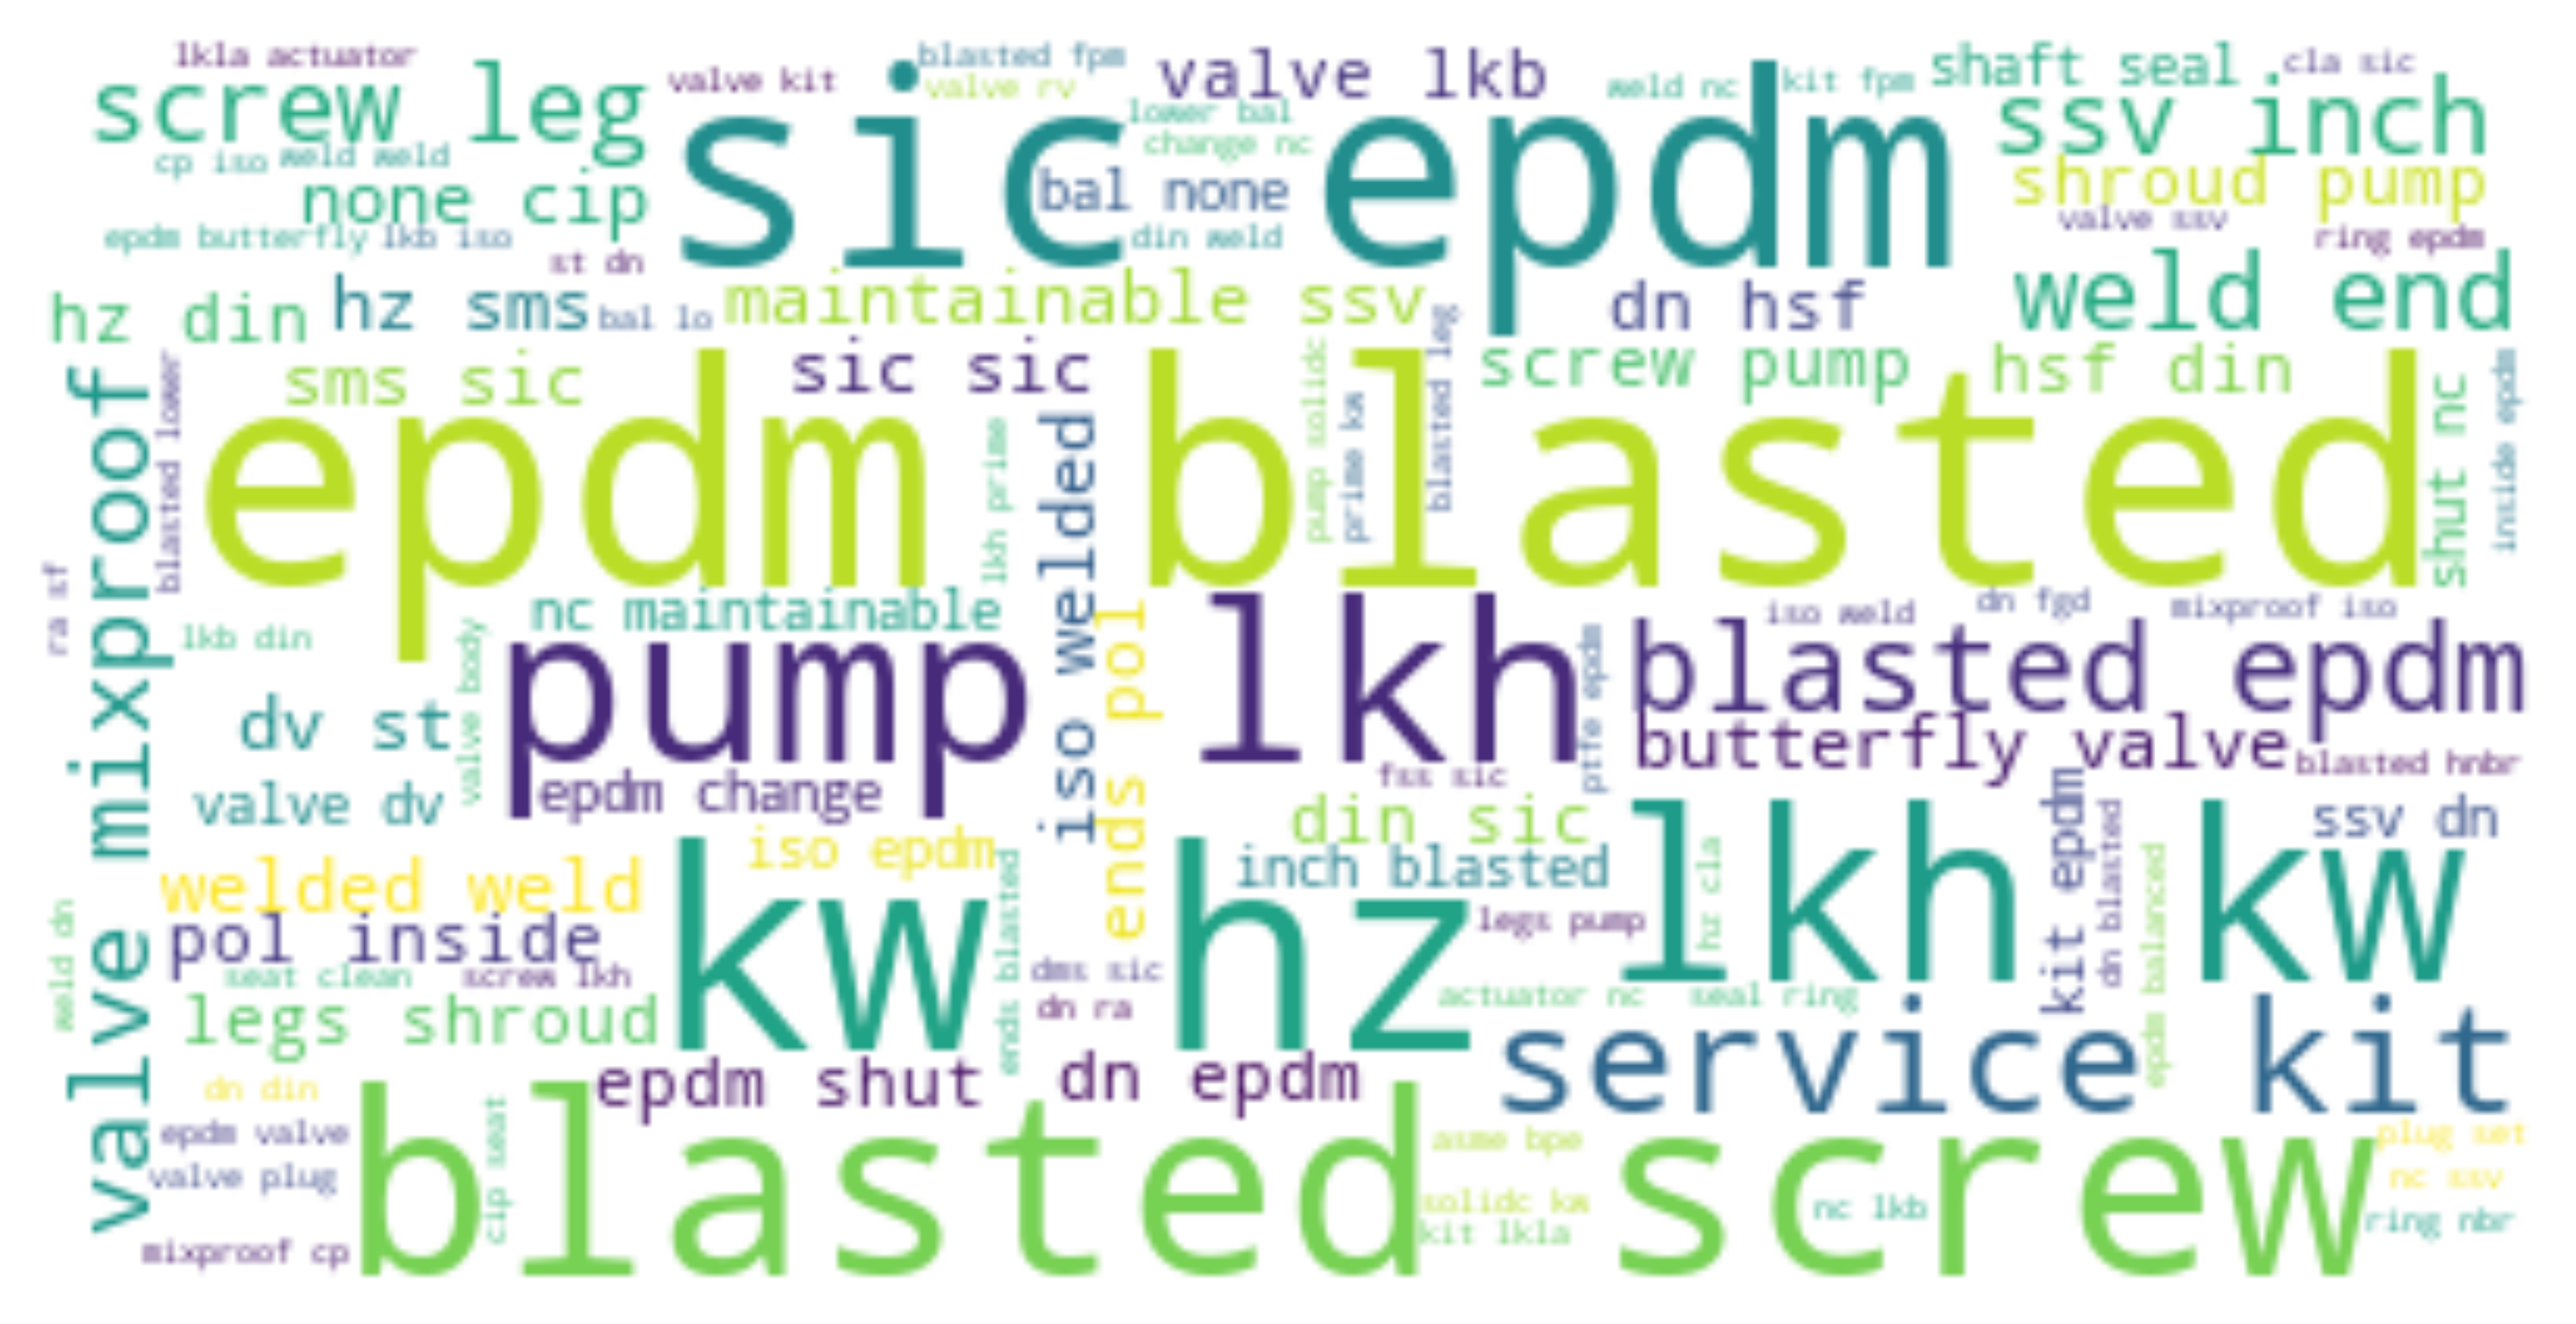

In [26]:
# plot word cloud 
text = ' '.join(df['description'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure(figsize=(9,9), dpi=600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file("figures/wordcloud_all_v2.png")